In [1]:
import pandas as pd
import numpy as np
import scipy.stats as spst
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')

In [4]:
import warnings
warnings.filterwarnings('ignore')

#plot 한글 깨짐
plt.rc('font', family='Malgun Gothic')

In [5]:
df = pd.read_csv('07_시계열적_컬럼구성.csv', encoding='cp949')

In [6]:
df.index = df.date
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

* * *

# 연 단위 검정

- 히스토그램의 개형 및 중심극한정리에 의해 각 3개년의 신고건수는 정규분포를 따른다고 가정
- levene테스트에 따르면 등분산을 만족하지 않음
- 따라서 welch_anova 검정 시행
    - pvalue가 0.05 이하이므로 귀무가설을 기각
    - 3개년 신고건수의 평균은 차이 있음
    - 즉 연도별로 신고건수에 대한 특정한 경향성은 없다고 판단

In [8]:
df = df[(df['year']==2020)|(df['year']==2021)|(df['year']==2022)]

In [9]:
df2020 = df.loc[df['year']==2020]
df2021 = df.loc[df['year']==2021]
df2022 = df.loc[df['year']==2022]

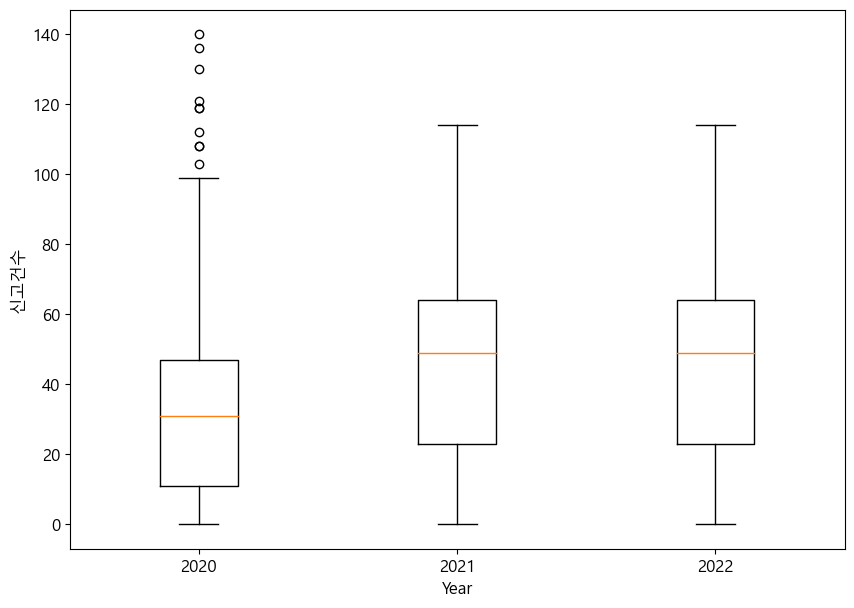

In [10]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')
fig, ax = plt.subplots()

ax.boxplot([df2020['신고건수'], df2021['신고건수'],df2021['신고건수']])
ax.set_xlabel('Year')
ax.set_ylabel('신고건수')
plt.xticks([1,2,3],[2020,2021,2022])

plt.show()

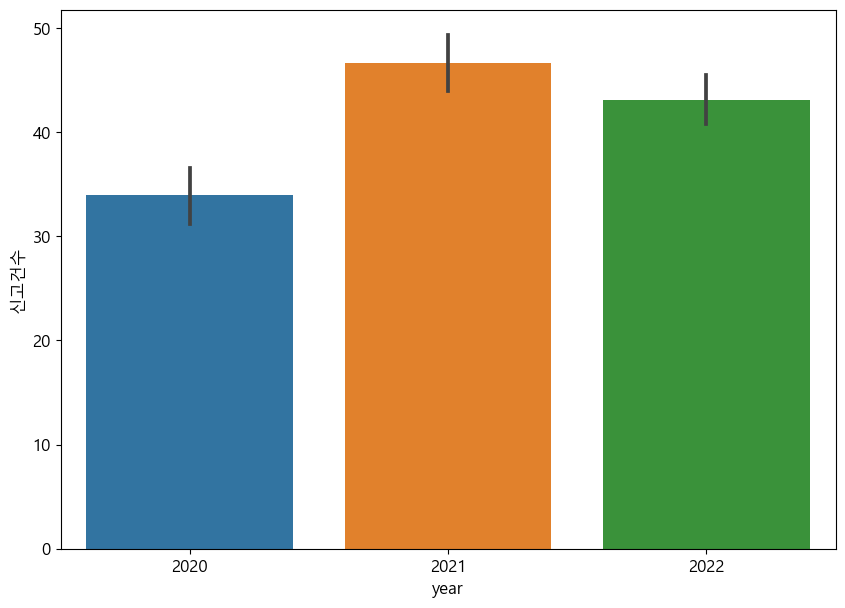

In [11]:
sns.barplot(x='year',y='신고건수', data=df)
plt.show()

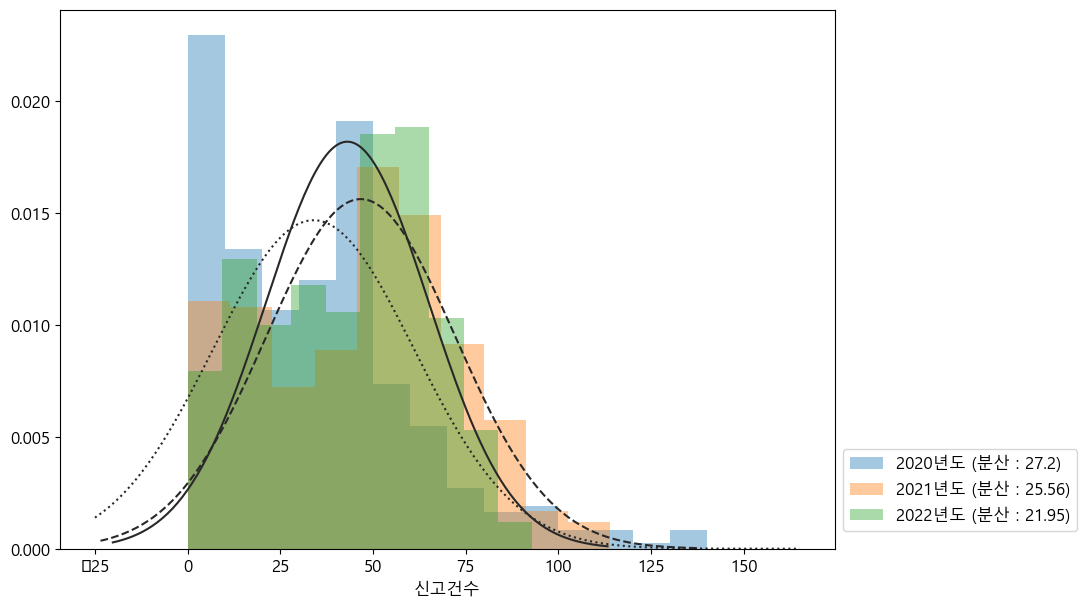

In [12]:
ax = sns.distplot(df2020['신고건수'], kde=False, fit=spst.norm, label=f"2020년도 (분산 : {np.round(df2020['신고건수'].std(),2)})")
ax = sns.distplot(df2021['신고건수'], kde=False, fit=spst.norm, label=f"2021년도 (분산 : {np.round(df2021['신고건수'].std(),2)})")
ax = sns.distplot(df2022['신고건수'], kde=False, fit=spst.norm, label=f"2022년도 (분산 : {np.round(df2022['신고건수'].std(),2)})")

ax.lines[0].set_linestyle(":")
ax.lines[1].set_linestyle("--")
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

In [16]:
result = spst.levene(df2020['신고건수'],df2021['신고건수'],df2022['신고건수'])
print(f'[ LeveneResult (20,21,22) ]\n statistic : {result[0]} / p-value : {result[1]}')

[ LeveneResult (20,21,22) ]
 statistic : 3.961723590035331 / p-value : 0.019304195554009654


* 레빈 테스트 결과 등분산을 만족하지 않음.
    * 등분산성을 만족하지 않았기에 welch_anova를 진행

In [17]:
total=pd.DataFrame()
total['year']=df2020['date'].dt.year
total['신고건수']=df2020['신고건수']

total2=pd.DataFrame()
total2['year']=df2021['date'].dt.year
total2['신고건수']=df2021['신고건수']

total3=pd.DataFrame()
total3['year']=df2022['date'].dt.year
total3['신고건수']=df2022['신고건수']

welch=pd.concat([total, total2,total3],axis=0)

In [19]:
import pingouin as pg
pg.welch_anova(data=welch,dv='신고건수',between='year')

,Source,ddof1,ddof2,F,p-unc,np2
0,year,2,722.582376,22.537298,3.201310e-10,0.044157


- 검정 결과에 따라 3개년 신고건수의 평균은 차이가 있다.
- 따라서 연도별로 어떤 경향성이 있지는 않음 결론  (p-unc는 p-value 의미)

* * *

## 월 단위 검정

- 앞서 살펴본 대로 연 단위끼리는 차이가 있기에 월 단위 간 모평균의 차이를 검정해보고자 함
- 표본개수가 30개 미만인 경우가 있기에 shaprio test 시행 -> 정규성 만족하지 않음
- kruskal 검정 결과 20년 월/21년 월/22년 월 모두 각 12개월 간 신고건수의 평균에 차이 있음

In [42]:
df['month'] = df['date'].dt.month

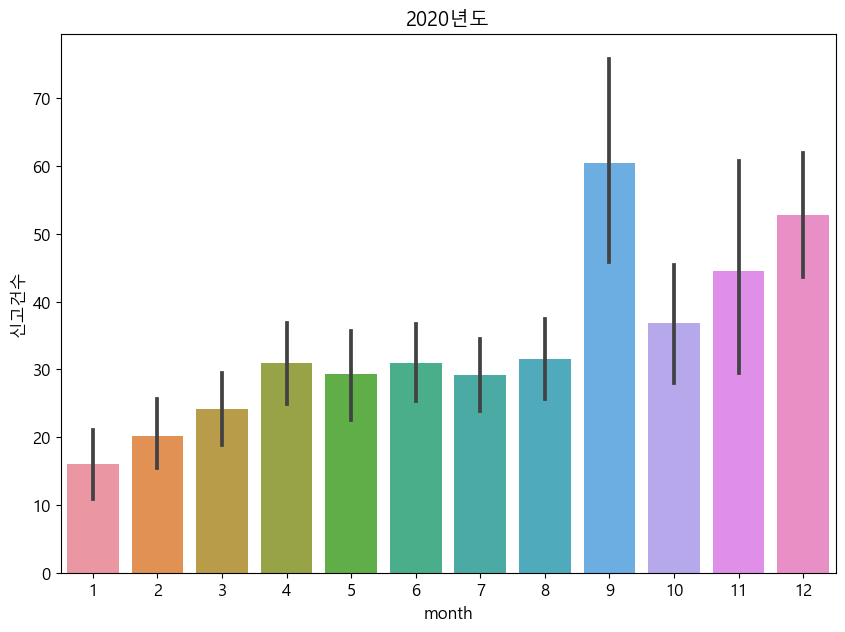

In [43]:
plt.figure(figsize=(10,7))
sns.barplot(df2020['month'],df2020['신고건수'])
plt.title('2020년도')
plt.show()

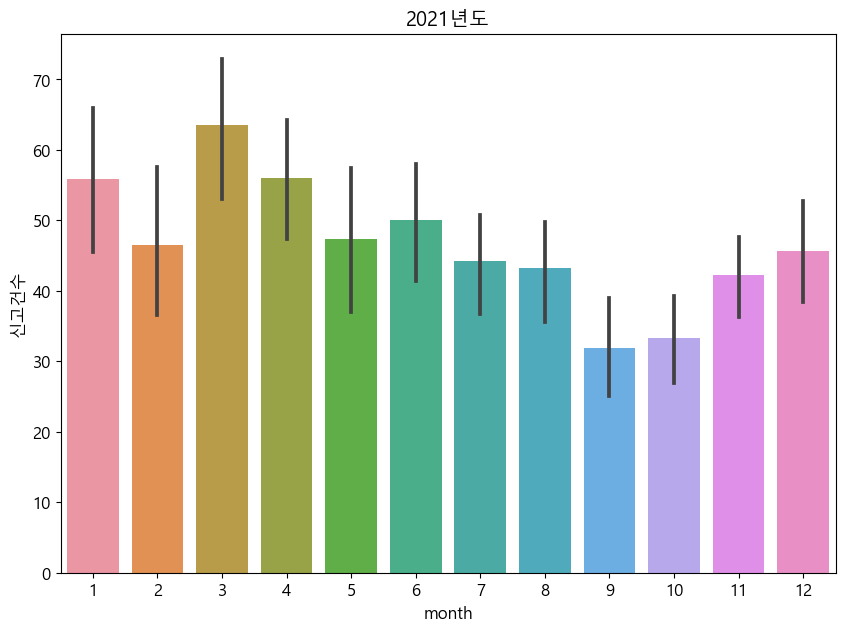

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(df2021['month'],df2021['신고건수'])
plt.title('2021년도')
plt.show()

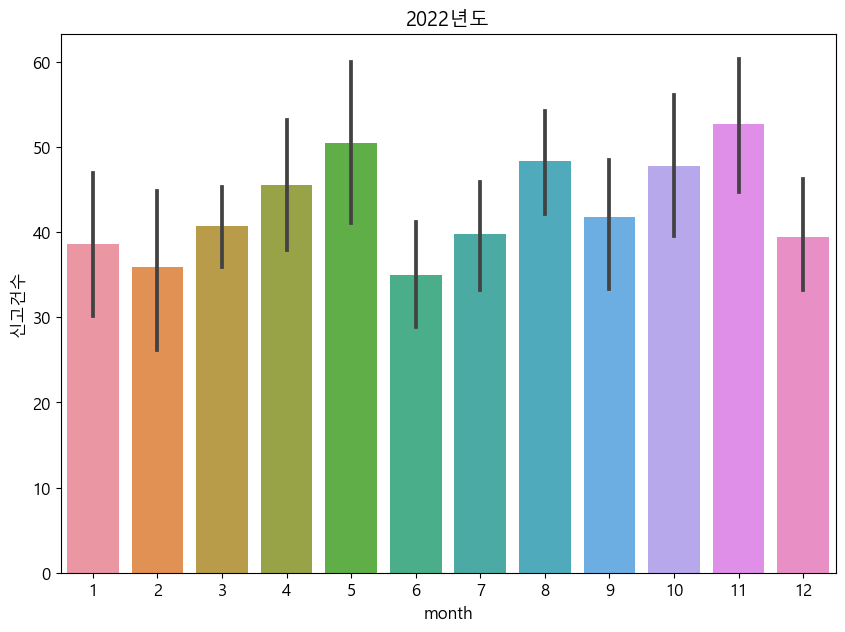

In [45]:
plt.figure(figsize=(10,7))
sns.barplot(df2022['month'],df2022['신고건수'])
plt.title('2022년도')
plt.show()

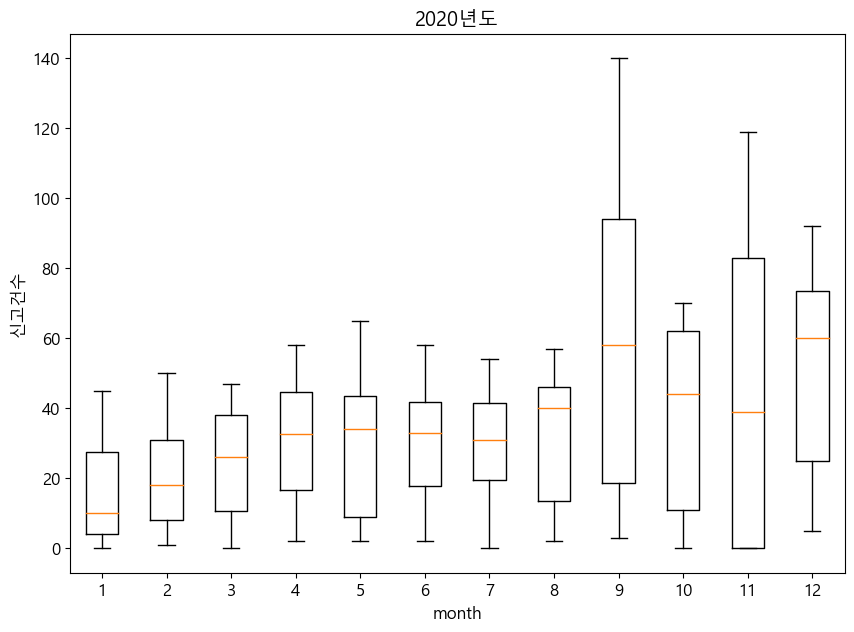

In [48]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')
fig, ax = plt.subplots()

ax.boxplot([q1[q1.index<'2021'],q2[q2.index<'2021'],q3[q3.index<'2021'],q4[q4.index<'2021'],q5[q5.index<'2021-01-01'],q6[q6.index<'2021'],q7[q7.index<'2021'],q8[q8.index<'2021'],q9[q9.index<'2021'],q10[q10.index<'2021'],q11[q11.index<'2021'],q12[q12.index<'2021']])
ax.set_xlabel('month')
ax.set_ylabel('신고건수')

plt.title('2020년도')
plt.show()

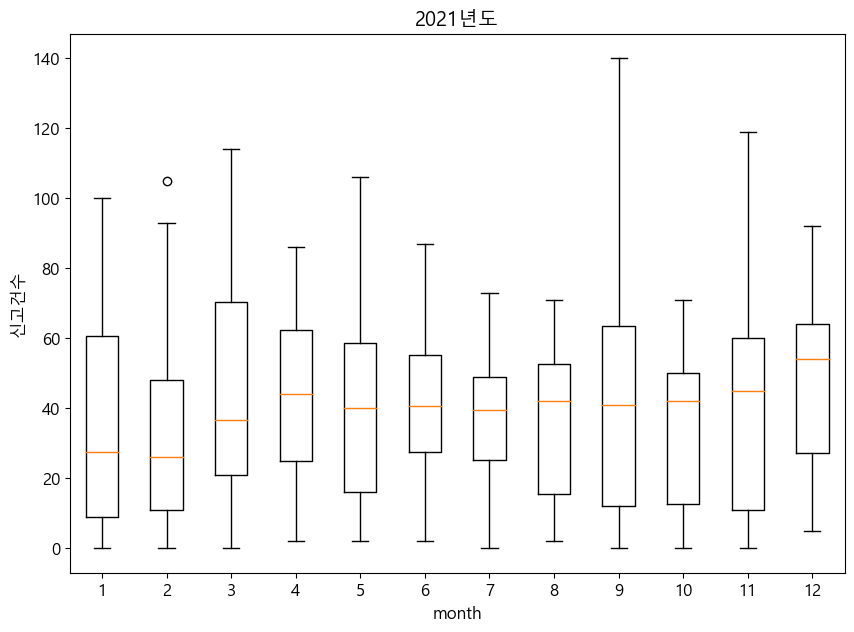

In [49]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')
fig, ax = plt.subplots()

ax.boxplot([q1[(q1.index<'2022')&(q1.index>'2020')],q2[(q2.index<'2022')&(q2.index>'2020')],q3[(q3.index<'2022')&(q3.index>'2020')],q4[(q4.index<'2022')&(q4.index>'2020')],q5[(q5.index<'2022')&(q5.index>'2020')],q6[(q6.index<'2022')&(q6.index>'2020')],q7[(q7.index<'2022')&(q7.index>'2020')],q8[(q8.index<'2022')&(q8.index>'2020')],q9[(q9.index<'2022')&(q9.index>'2020')],q10[(q10.index<'2022')&(q10.index>'2020')],q11[(q11.index<'2022')&(q11.index>'2020')],q12[(q12.index<'2022')&(q12.index>'2020')]])
ax.set_xlabel('month')
ax.set_ylabel('신고건수')

plt.title('2021년도')
plt.show()

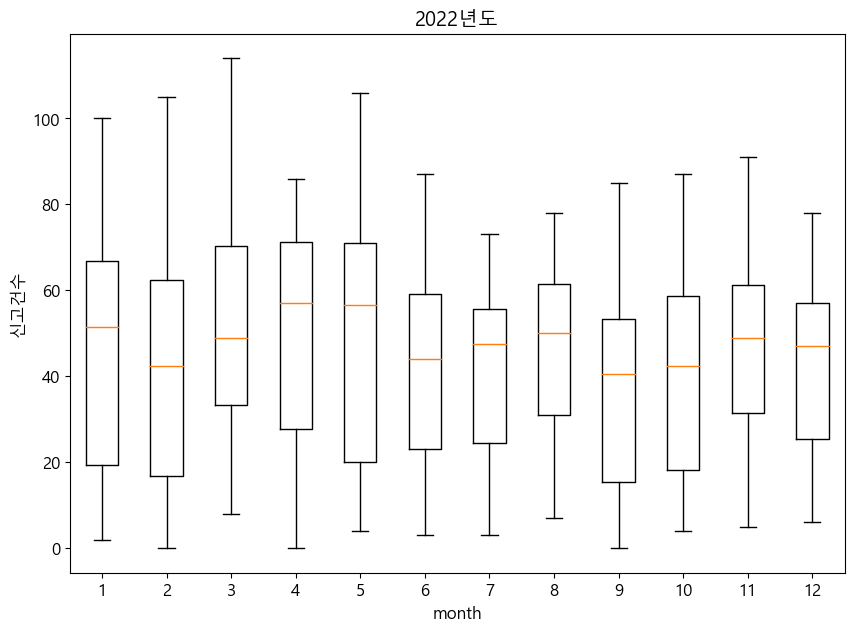

In [50]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')
fig, ax = plt.subplots()

ax.boxplot([q1[q1.index>'2021'],q2[q2.index>'2021'],q3[q3.index>'2021'],q4[q4.index>'2021'],q5[q5.index>'2021'],q6[q6.index>'2021'],q7[q7.index>'2021'],q8[q8.index>'2021'],q9[q9.index>'2021'],q10[q10.index>'2021'],q11[q11.index>'2021'],q12[q12.index>'2021']])
ax.set_xlabel('month')
ax.set_ylabel('신고건수')

plt.title('2022년도')
plt.show()

In [28]:
def qqq(df):
    q1  = df.loc[df['month']==1, '신고건수']
    q2  = df.loc[df['month']==2, '신고건수']
    q3  = df.loc[df['month']==3, '신고건수']
    q4  = df.loc[df['month']==4, '신고건수']
    q5  = df.loc[df['month']==5, '신고건수']
    q6  = df.loc[df['month']==6, '신고건수']
    q7  = df.loc[df['month']==7, '신고건수']
    q8  = df.loc[df['month']==8, '신고건수']
    q9  = df.loc[df['month']==9, '신고건수']
    q10  = df.loc[df['month']==10, '신고건수']
    q11 = df.loc[df['month']==11, '신고건수']
    q12  = df.loc[df['month']==12, '신고건수']
    
    return q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12

In [29]:
q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12=qqq(df2020)

In [81]:
temp=[q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12]
for i in temp:
    print(spst.shapiro(i))

ShapiroResult(statistic=0.9269283413887024, pvalue=6.211131403688341e-05)
ShapiroResult(statistic=0.9368689656257629, pvalue=0.00042891671182587743)
ShapiroResult(statistic=0.9537308812141418, pvalue=0.0023423160891979933)
ShapiroResult(statistic=0.960593044757843, pvalue=0.008002383634448051)
ShapiroResult(statistic=0.9396455883979797, pvalue=0.00031872146064415574)
ShapiroResult(statistic=0.9752887487411499, pvalue=0.08386693894863129)
ShapiroResult(statistic=0.9648367166519165, pvalue=0.013158616609871387)
ShapiroResult(statistic=0.9550725221633911, pvalue=0.002864173846319318)
ShapiroResult(statistic=0.9263753294944763, pvalue=7.613172783749178e-05)
ShapiroResult(statistic=0.9503343105316162, pvalue=0.001420316519215703)
ShapiroResult(statistic=0.9657624363899231, pvalue=0.01792316883802414)
ShapiroResult(statistic=0.9481732845306396, pvalue=0.001039931201376021)


In [82]:
print(spst.kruskal(*temp))

KruskalResult(statistic=23.089752921862978, pvalue=0.017166979469685355)


In [83]:
q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12=qqq(df2021)

In [84]:
temp=[q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12]
for i in temp:
    print(spst.shapiro(i))

ShapiroResult(statistic=0.9097470045089722, pvalue=0.012733625248074532)
ShapiroResult(statistic=0.9627040028572083, pvalue=0.4033064842224121)
ShapiroResult(statistic=0.9419745802879333, pvalue=0.09358459711074829)
ShapiroResult(statistic=0.8872313499450684, pvalue=0.004150324501097202)
ShapiroResult(statistic=0.9262063503265381, pvalue=0.03460307791829109)
ShapiroResult(statistic=0.9493311643600464, pvalue=0.16222329437732697)
ShapiroResult(statistic=0.9283639788627625, pvalue=0.039579324424266815)
ShapiroResult(statistic=0.8750046491622925, pvalue=0.0018130425596609712)
ShapiroResult(statistic=0.9221442341804504, pvalue=0.0304968673735857)
ShapiroResult(statistic=0.923641562461853, pvalue=0.02952231466770172)
ShapiroResult(statistic=0.9302064180374146, pvalue=0.04972689598798752)
ShapiroResult(statistic=0.8557464480400085, pvalue=0.0006732530309818685)


In [85]:
print(spst.kruskal(*temp))

KruskalResult(statistic=44.700042876766965, pvalue=5.478309911417966e-06)


In [86]:
q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12=qqq(df2022)

In [87]:
temp=[q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12]
for i in temp:
    print(spst.shapiro(i))

ShapiroResult(statistic=0.9063335657119751, pvalue=0.010412098839879036)
ShapiroResult(statistic=0.9465375542640686, pvalue=0.162023663520813)
ShapiroResult(statistic=0.9639043807983398, pvalue=0.3686470091342926)
ShapiroResult(statistic=0.9291762113571167, pvalue=0.0466926284134388)
ShapiroResult(statistic=0.8565589785575867, pvalue=0.0007011542329564691)
ShapiroResult(statistic=0.9552395343780518, pvalue=0.23300211131572723)
ShapiroResult(statistic=0.9221758842468262, pvalue=0.02697397954761982)
ShapiroResult(statistic=0.9538084268569946, pvalue=0.19865676760673523)
ShapiroResult(statistic=0.9504706859588623, pvalue=0.17403754591941833)
ShapiroResult(statistic=0.9018847346305847, pvalue=0.008035491220653057)
ShapiroResult(statistic=0.9413203597068787, pvalue=0.09872270375490189)
ShapiroResult(statistic=0.9542306065559387, pvalue=0.20400361716747284)


In [88]:
print(spst.kruskal(*temp))

KruskalResult(statistic=25.750808651939344, pvalue=0.007067138887726097)


* 월 단위 간 모평균의 차이를 검정하고자 shapiro test 실행하였지만 정규성을 만족하지 않음
* 그로 인해 kruskal 검정을 해 본 결과, 3개년도 모두 각 12개월 간 신고건수 평균에 차이가 있음을 확인

* * *

# 주 단위 검정

- 주 단위는 양이 너무 많아 시각화는 생략
- 각 주별로 shaprio test 검정 결과 주별(총 52주) 표본은 정규성 만족하지 않음
- 연속되는 4주를 묶어 kruskal 검정 시행 결과 20/21/22년 대부분(약 90%)는 연속적인 4주끼리는 평균은 차이가 없음
- 이에 따라 모델에 이전 7일의 신고건수 평균과 이전 28일의 신고건수의 평균을 feature로 넣어 모델이 시계열적인 변화추이를 학습하도록 구성하였다.

In [95]:
def weektest(df,n):
    temp=[df[df['Week']==x]['신고건수'] for x in range(n, n+4)]
    return temp

In [106]:
for i in range(1,53):
    cond=df2020['Week']==i
    print(spst.shapiro(df2020[cond]['신고건수']))

ShapiroResult(statistic=0.8019227385520935, pvalue=0.08400378376245499)
ShapiroResult(statistic=0.8908103108406067, pvalue=0.27891674637794495)
ShapiroResult(statistic=0.8926215171813965, pvalue=0.28861895203590393)
ShapiroResult(statistic=0.9180185794830322, pvalue=0.45415791869163513)
ShapiroResult(statistic=0.9755673408508301, pvalue=0.9353882670402527)
ShapiroResult(statistic=0.9766035676002502, pvalue=0.9414880871772766)
ShapiroResult(statistic=0.9743485450744629, pvalue=0.9278830289840698)
ShapiroResult(statistic=0.9479278326034546, pvalue=0.7108050584793091)
ShapiroResult(statistic=0.8802553415298462, pvalue=0.22758351266384125)
ShapiroResult(statistic=0.9766427874565125, pvalue=0.9417136311531067)
ShapiroResult(statistic=0.9583674073219299, pvalue=0.8046117424964905)
ShapiroResult(statistic=0.8674540519714355, pvalue=0.17631949484348297)
ShapiroResult(statistic=0.990882933139801, pvalue=0.9947363138198853)
ShapiroResult(statistic=0.9018319249153137, pvalue=0.34221866726875305)


In [100]:
for i in range(1,52,4):
    print(spst.kruskal(*weektest(df2020,i)))

KruskalResult(statistic=5.888638920134987, pvalue=0.1171556858642918)
KruskalResult(statistic=5.784128724112285, pvalue=0.12259841891930585)
KruskalResult(statistic=0.7887925963687566, pvalue=0.8521457758276195)
KruskalResult(statistic=3.7694324853228927, pvalue=0.28746172200746123)
KruskalResult(statistic=2.9988255099244365, pvalue=0.39180629498735275)
KruskalResult(statistic=1.0795347744360853, pvalue=0.7820166253526407)
KruskalResult(statistic=0.816320928591024, pvalue=0.8455594316598035)
KruskalResult(statistic=0.29499530075186514, pvalue=0.9609669647918991)
KruskalResult(statistic=1.7087534821673858, pvalue=0.6349894528792317)
KruskalResult(statistic=12.867707477403442, pvalue=0.0049316075585955415)
KruskalResult(statistic=4.410126879699236, pvalue=0.2204482252174635)
KruskalResult(statistic=14.974535554131956, pvalue=0.001838539896507382)
KruskalResult(statistic=3.230832420591458, pvalue=0.3573860810650391)


In [107]:
for i in range(1,53):
    cond=df2021['Week']==i
    print(spst.shapiro(df2021[cond]['신고건수']))

ShapiroResult(statistic=0.8867543339729309, pvalue=0.2581571936607361)
ShapiroResult(statistic=0.782360851764679, pvalue=0.027291223406791687)
ShapiroResult(statistic=0.9441211223602295, pvalue=0.6760724782943726)
ShapiroResult(statistic=0.9841146469116211, pvalue=0.9770607352256775)
ShapiroResult(statistic=0.8122419118881226, pvalue=0.054019276052713394)
ShapiroResult(statistic=0.8288347125053406, pvalue=0.0780072957277298)
ShapiroResult(statistic=0.9553203582763672, pvalue=0.7777256369590759)
ShapiroResult(statistic=0.893822193145752, pvalue=0.2951998710632324)
ShapiroResult(statistic=0.8719680905342102, pvalue=0.19311481714248657)
ShapiroResult(statistic=0.8461670875549316, pvalue=0.11333440244197845)
ShapiroResult(statistic=0.9692604541778564, pvalue=0.8930707573890686)
ShapiroResult(statistic=0.9453117847442627, pvalue=0.6869263648986816)
ShapiroResult(statistic=0.9456242322921753, pvalue=0.6897766590118408)
ShapiroResult(statistic=0.9303602576255798, pvalue=0.5539674162864685)
Sh

In [102]:
for i in range(1,52,4):
    print(spst.kruskal(*weektest(df2021,i)))

KruskalResult(statistic=1.1501721170395776, pvalue=0.7649781839383134)
KruskalResult(statistic=11.784717062297128, pvalue=0.008158217677014122)
KruskalResult(statistic=1.0303326810176014, pvalue=0.7939128904266505)
KruskalResult(statistic=2.020458457205434, pvalue=0.5681713521053104)
KruskalResult(statistic=3.6338011604202505, pvalue=0.3038186633941539)
KruskalResult(statistic=2.3521485369579707, pvalue=0.5026043063344354)
KruskalResult(statistic=2.391428571428561, pvalue=0.4952321858722072)
KruskalResult(statistic=0.6802366585690571, pvalue=0.8778423455085603)
KruskalResult(statistic=2.4582941729323187, pvalue=0.48287543116231435)
KruskalResult(statistic=8.36436597110755, pvalue=0.03905203474496799)
KruskalResult(statistic=0.6331675997337688, pvalue=0.888799177005205)
KruskalResult(statistic=1.5939044481054385, pvalue=0.6607727337426379)
KruskalResult(statistic=0.402779816962762, pvalue=0.939667652929122)


In [104]:
for i in range(1,53):
    cond=df2022['Week']==i
    print(spst.shapiro(df2022[cond]['신고건수']))

ShapiroResult(statistic=0.8642985820770264, pvalue=0.16535434126853943)
ShapiroResult(statistic=0.897455096244812, pvalue=0.31584829092025757)
ShapiroResult(statistic=0.8714932203292847, pvalue=0.19128477573394775)
ShapiroResult(statistic=0.9608627557754517, pvalue=0.8261014223098755)
ShapiroResult(statistic=0.8383728265762329, pvalue=0.09594324976205826)
ShapiroResult(statistic=0.9295446276664734, pvalue=0.5470328330993652)
ShapiroResult(statistic=0.8347217440605164, pvalue=0.08867055177688599)
ShapiroResult(statistic=0.9707638621330261, pvalue=0.9038981795310974)
ShapiroResult(statistic=0.9525984525680542, pvalue=0.7532783150672913)
ShapiroResult(statistic=0.9306017160415649, pvalue=0.5560286045074463)
ShapiroResult(statistic=0.8587183952331543, pvalue=0.14743484556674957)
ShapiroResult(statistic=0.9447755217552185, pvalue=0.6820357441902161)
ShapiroResult(statistic=0.9612505435943604, pvalue=0.8293891549110413)
ShapiroResult(statistic=0.92366623878479, pvalue=0.49840888381004333)
Sh

In [105]:
for i in range(1,52,4):
    print(spst.kruskal(*weektest(df2022,i)))

KruskalResult(statistic=2.0343625107750016, pvalue=0.5653053563138126)
KruskalResult(statistic=16.8406743858551, pvalue=0.0007621151935188337)
KruskalResult(statistic=0.5407407407407416, pvalue=0.909853893534339)
KruskalResult(statistic=2.2540508806262185, pvalue=0.521380641881414)
KruskalResult(statistic=1.456343765913268, pvalue=0.692382186129633)
KruskalResult(statistic=3.247731184478166, pvalue=0.3549839946093766)
KruskalResult(statistic=3.624466293235138, pvalue=0.3049744122335981)
KruskalResult(statistic=2.5809367296631076, pvalue=0.4608413900510484)
KruskalResult(statistic=6.046132175137916, pvalue=0.10938723875223895)
KruskalResult(statistic=1.5067459231160412, pvalue=0.6807142523072356)
KruskalResult(statistic=0.27988577687372096, pvalue=0.9637659414602723)
KruskalResult(statistic=4.5510483492411264, pvalue=0.20778183870420683)
KruskalResult(statistic=4.016777695534172, pvalue=0.259658131898494)
